In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def laplace(A,h):
    At=A[0:-2,1:-1]
    Al=A[1:-1,0:-2]
    Ab=A[2:,1:-1]
    Ar=A[1:-1,2:]
    Ac=A[1:-1,1:-1]
    return (At+Al+Ab+Ar-4*Ac)/h**2

In [3]:
yi, yf = xi, xf = (0, 1)
h = 0.02

a = 0.00028
b = 0.005
tau = 0.1
k = -0.005

tf = 10
dt = 0.001

Deltat=2#Para poder gráficar cada dos segundos
n1=int(1/h)
n2=int(tf/dt)

In [4]:
X=np.linspace(0,1,n1)
Y=np.linspace(0,1,n1)
T=np.linspace(0,tf,n2)
Psi= np.random.rand(len(X),len(Y))
Phi= np.random.rand(len(X),len(Y))

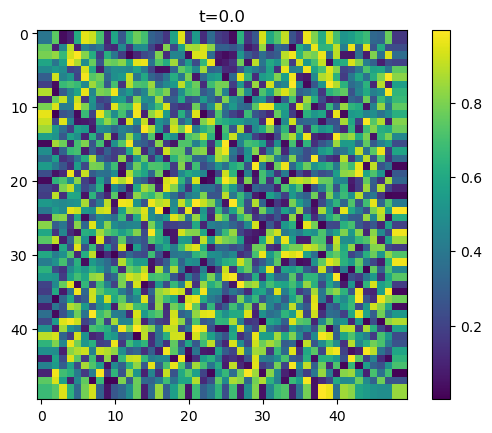

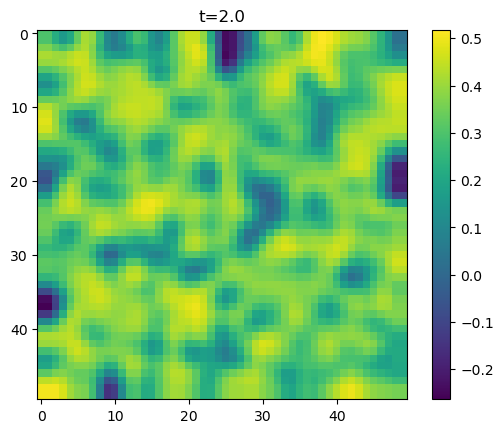

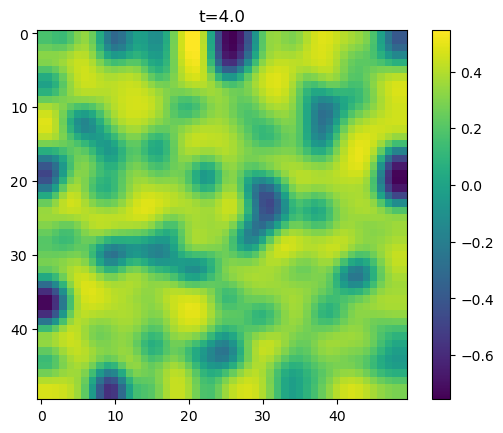

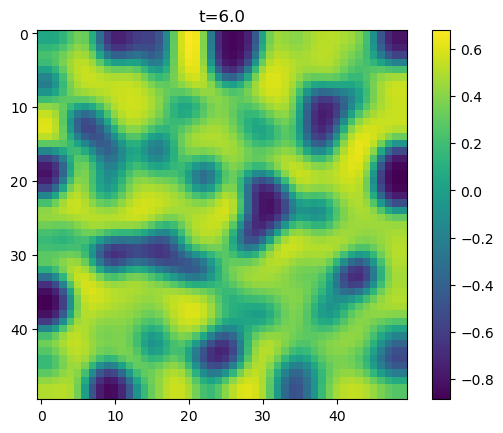

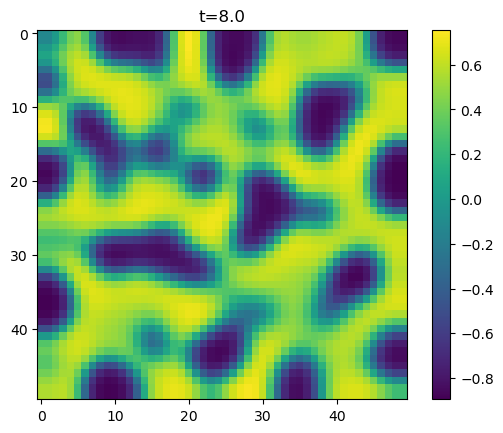

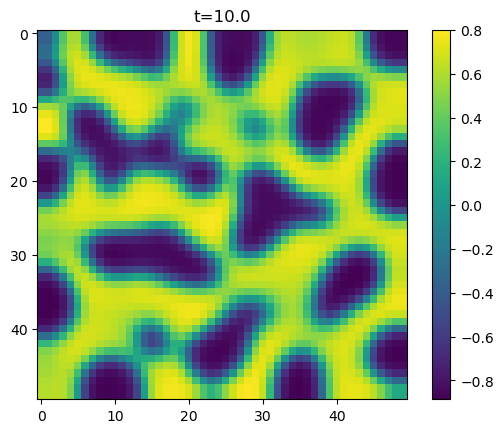

In [5]:
for n in range(n2+1):
    t=n*dt
    dPhi=laplace(Phi,h)
    dPsi=laplace(Psi,h)
    #Se excluyen los valores de los bordes, para calcular de manera discreta
    Phic=Phi[1:-1,1:-1]
    Psic=Psi[1:-1,1:-1]
    Phi[1:-1,1:-1]=Phic+dt*(a*dPhi+Phic-Phic**3-Psic+k)
    Psi[1:-1,1:-1]=Psic+dt*(b*dPsi+Phic-Psic)/tau
    for A in (Phi,Psi): #Condición de frontera tipo Neumann
        A[0,:]=A[1,:]
        A[-1,:]=A[-2,:]
        A[:,0]=A[:,1]
        A[:,-1]=A[:,-2]
    if t%Deltat==0: #Gráficar cada dos segundos
        plt.imshow(Phi,interpolation='none')
        plt.title(f"t={t}")
        plt.colorbar()
        plt.show()